In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
p = pd.read_csv('pedestal-2025-05-16-mask-toa-ch-10.csv')
p = p[p.bx!=3276]

In [10]:
p[['link','channel','adc']]

,link,channel,adc
74,0,calib,27
75,0,0,7
76,0,1,30
77,0,2,38
78,0,3,54
...,...,...,...
7395,1,31,3
7396,1,32,15
7397,1,33,19
7398,1,34,54


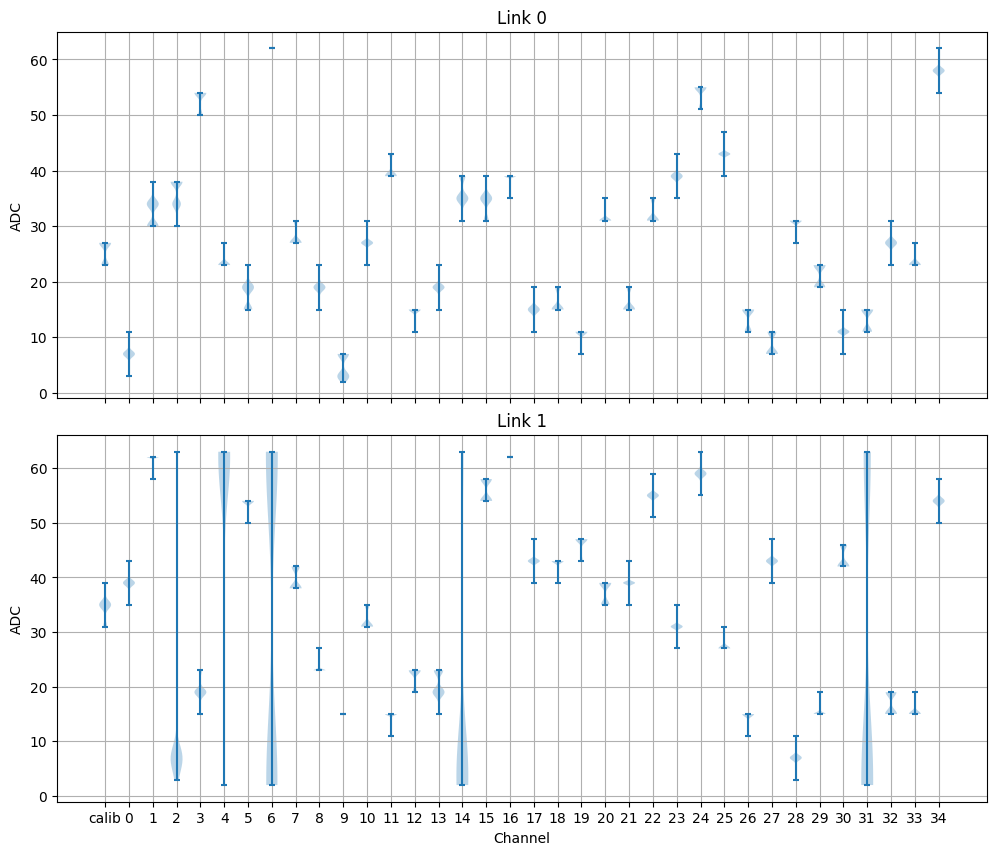

In [30]:
fig, axes = plt.subplots(
    nrows=2,
    figsize=(12,10),
    sharex=True,
    gridspec_kw = dict(
        hspace = 0.1
    )
)
channels = ['calib']+[str(c) for c in range(35)]
for link, ax in enumerate(axes):
    ax.violinplot(
        [ p[(p.link==link)&(p.channel==ch)].adc for ch in channels]
    )
    ax.set_ylabel('ADC')
    ax.set_title(f'Link {link}')
    ax.grid()
axes[-1].set_xticks(
    [i+1 for i in range(len(channels))],
    channels
)
axes[-1].set_xlabel('Channel')
fig.savefig('violin-eg.png', bbox_inches='tight')
plt.show()